# Useful links, tutorials, and reads when starting a Bioinformatics project #

This simple page contain links to various sources that are good to know before and during a Bioinformatics project. It is written in [Jupyter Notebook](https://jupyter.org) which is a notebook system that enables you to write code, run it and document it in an iteractive environment. It is strongly suggested that you use it.


### Setup ###

1. Create a SNIC user at https://supr.snic.se/person/register/new/? this will allow you
access to the SuperComputing Resources available to the
group. Currently, around 300,000 core hours/month.

    * When you have gotten the SUPR account apply to membership in all the projects: https://supr.snic.se/project/request/?search=wallner
    *

2. Create a [github](http://github.com) account. Git is a version control system that enable you to keep track of changes to your code. No more: script.py, script_new.py, scrip_new2.py etc. Github is a cloud-based service that facilities the distribution and sharing of the code. The idea is that you should use git for your project, t

    * [Learn git in 15 minutes, interactive learning] https://try.github.io/ 
    * [10 minutes quick start to github] https://guides.github.com/activities/hello-world/
    
3. Create a 'new repository' in your github account named 'exjobb'
    * Choose to import from another repository
        * use the link https://github.com/bjornwallner/exjobb to import some initial files for you exjobb.
    * Copy the url of your newly created repo, e.g https://github.com/[REPLACE_WITH_GITHUB_USER]/exjobb and send it to bjornw_AT_ifm.liu.se

4. Install [Anaconda](https://www.anaconda.com/download/) choose the Python 2.7 version. This will install a special version of Python that includes the Jupyter Notebook and basically all Python modules needed (deep-learning modules that has to be installed separately)

5. Familiarize with [Jupyter Notebook](https://jupyter.org) using the following tutorial: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook. 

6. Creating your first 'exjobb' files:  

  * In a terminal you can make a local copy of your `exjobb` repo in github by the command: 
```
    git clone https://github.com/[REPLACE_WITH_GITHUB_USER]/exjobb
```
   This will download the contents of `exjobb` repo to the folder `exjobb/`
    * Change the folder: `cd exjobb`
    * Start the notebook with the following command: `jupyter notebook wiki.ipynb`, which will open the notebook for this current document.
    * You can use this notebook to play around with what you can do. This is actually a good way to learn python interactively (See Jupyter heading below) 
        
    * When you have created new files that you want to add to the version control you can do `git add <filename>` or `git add *` do put them under version control by git.
    * `git commit -a -m 'Initial commit'` will add the current changes to the repo with the message 'Initial commit'.
    * `git push` will upload all the changes to github. You can go to https://github.com/[REPLACE_WITH_GITHUB_USER]/exjobb to check that it worked.
    
    

# Learn some stuff #



### Python ###



We are still using Python 2, mostly because it works and we have not seen any reason to move to Python 3. These quite old articles still hold:

* https://learntocodewith.me/programming/python/python-2-vs-python-3/
* http://blog.thezerobit.com/2014/05/25/python-3-is-killing-python.html

Code Academy is good place to learn python interactively. 

* https://www.codecademy.com/learn/learn-python

We can also recommend the Google Python Class that contains Videos lectures as well.

* https://developers.google.com/edu/python/


###  Python modules ###

Here is a list of the most common modules we are using. They can be installed using for instance `pip`, but if you have installed Anaconda, you will have gotten most packages installed already, including the ones below.

```
pip install scipy
pip install scikit-learn
pip install seaborn

```

[SciPy](https://www.scipy.org) (pronounced “Sigh Pie”) contains these core packages:

* NumPy - Base N-dimensional array package
* SciPy library - Fundamental library for scientific computing
* Matplotlib - Comprehensive 2D Plotting
* IPython - Enhanced Interactive Console
* pandas - Data structures & analysis


[scikit-learn](http://scikit-learn.org/) is the package we use to do machine learning.

[scikit-learn tutorials](http://scikit-learn.org/stable/tutorial/index.html) contains an introduction to scikit-learn. 

[keras](http://keras.io) is the package we use for deep-learning (This is not part of anaconda)

[seaborn](https://seaborn.pydata.org) is used to produce publication grade plots with minimal effort.




### Jupyter ###
[Jupyter](https://jupyter.org) is a notebook system that enables you to write code, run it and document it in an iteractive environment. It is strongly suggested that you use it.

https://svds.com/jupyter-notebook-best-practices-for-data-science/

#### securing the notebook ####

If you are running the notebook on a shared system, such as NSC. It is good that you secure it using a password and turn on encryption (https). Below is an extract from http://jupyter-notebook.readthedocs.io/en/stable/public_server.html#notebook-server-security on how to do that.

First generate a config file you do not already have one.
```
jupyter notebook --generate-config

```
Prepare a hashed password using the following code:

In [1]:
from notebook.auth import passwd
passwd()

Enter password: ········
Verify password: ········


'sha1:987124a2ecd8:e7d4448761811cf05db45f34271ec52e031191b6'

#### making .py and .html conversion automatically when saving the notebook 

Reference: https://svds.com/jupyter-notebook-best-practices-for-data-science/

Put the following at the top of `jupyter_notebook_config.py` file:

``` python
import os
from subprocess import check_call

def post_save(model, os_path, contents_manager):
    """post-save hook for converting notebooks to .py scripts"""
    if model['type'] != 'notebook':
        return # only do this for notebooks
    d, fname = os.path.split(os_path)
    check_call(['jupyter', 'nbconvert', '--to', 'script', fname], cwd=d)
    check_call(['jupyter', 'nbconvert', '--to', 'html', fname], cwd=d)

c.FileContentsManager.post_save_hook = post_save
```

<IPython.core.display.Javascript object>


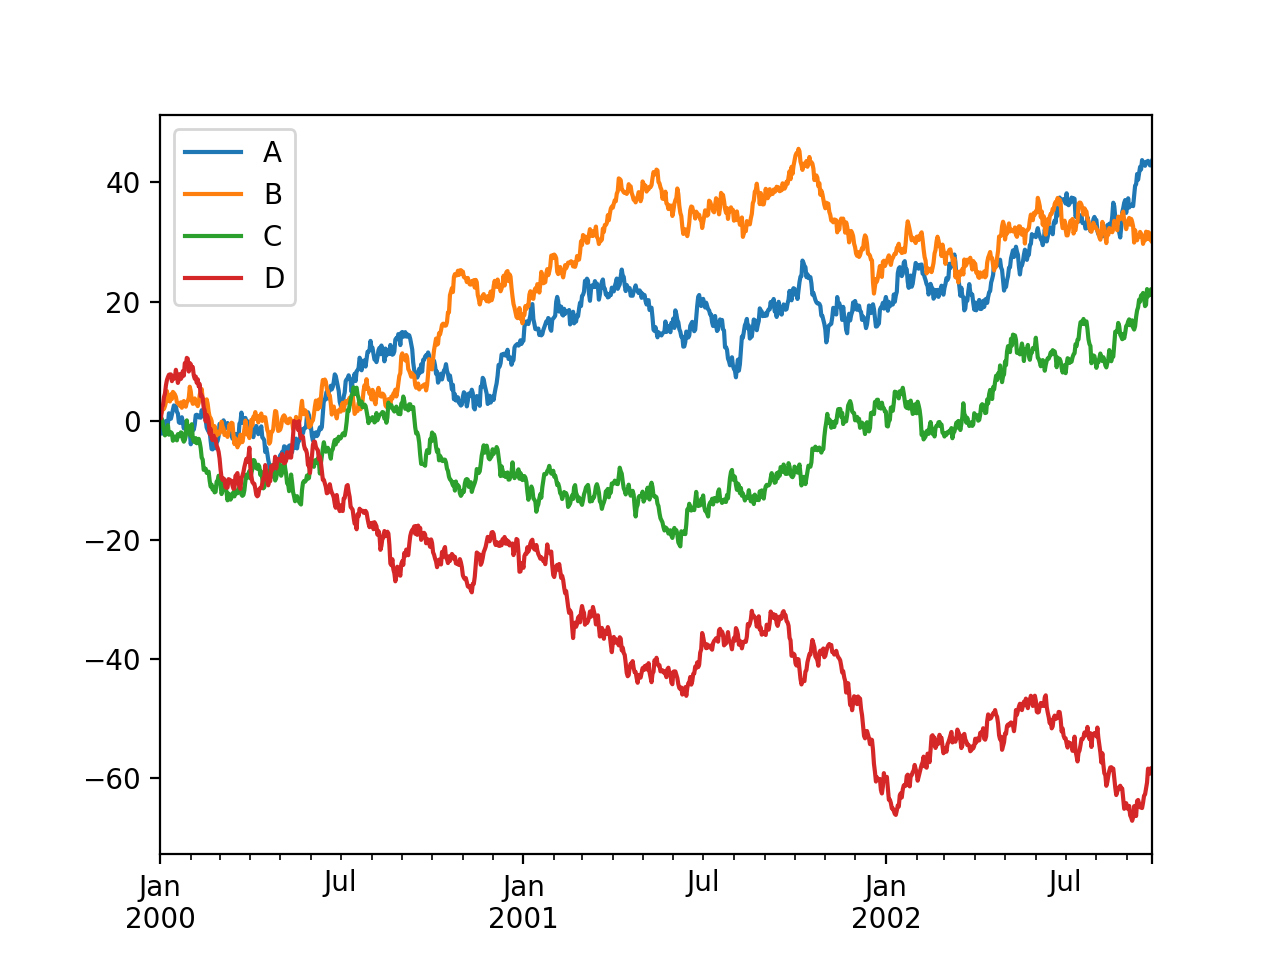

In [2]:
#Just testing some plotting...
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); plt.legend(loc='best')